In [298]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import regex as re
import os


In [299]:
df = pd.read_csv('../Dataset/laptop_price.csv', encoding="ISO-8859-1")

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [301]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [302]:
df = df.rename(columns=str.lower)
df = df.rename(columns={'price_euros':'price'})
df.columns

Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price'],
      dtype='object')

### Feature Engineering 

In [303]:
df['laptop_id']

0          1
1          2
2          3
3          4
4          5
        ... 
1298    1316
1299    1317
1300    1318
1301    1319
1302    1320
Name: laptop_id, Length: 1303, dtype: int64

In [304]:
# drop these column of laptop id as of no use and it is not consistant
df =df.drop('laptop_id', axis=1)

In [305]:
df['screenresolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: screenresolution, Length: 1303, dtype: object

we can see that the above column contain three type of info screen type , resoulution and whether it is touchscreen or not. We can do some feature engineering by separating these three.


In [306]:
df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')

In [307]:
df['screentype'] = df['screenresolution'].replace(r'(\d+x\d+)','',regex=True)

In [308]:
df['screentype'] = df['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)

In [309]:
df['screentype']

0       IPS Panel Retina Display 
1                                
2                                
3       IPS Panel Retina Display 
4       IPS Panel Retina Display 
                  ...            
1298     IPS Panel   Touchscreen 
1299     IPS Panel   Touchscreen 
1300                             
1301                             
1302                             
Name: screentype, Length: 1303, dtype: object

In [310]:
df['touchscreen'] = df['screentype'].str.extract(r'(Touchscreen)')
df['screentype'] = df['screentype'].replace(r'(Touchscreen)','',regex=True)

In [311]:
df['touchscreen'].value_counts()

Touchscreen    192
Name: touchscreen, dtype: int64

In [312]:
#one hot encoding if touchscreen then 1   else 0

df['touchscreen'] = df['touchscreen'].replace('Touchscreen',1)
df['touchscreen'] = df['touchscreen'].replace(np.nan,0)

In [313]:
# check for the screetypes 
df['screentype'].value_counts()



                             549
                             314
IPS Panel                    265
                              75
IPS Panel                     72
IPS Panel Retina Display      17
IPS Panel                     11
Name: screentype, dtype: int64

In [314]:
df['screentype']=df['screentype'].replace(r' ','',regex=True)
df['screentype'].value_counts()

                         938
IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [315]:
# replacing blank spaces with NaN
df['screentype'] = df['screentype'].replace(r'^\s*$', np.nan, regex=True)
df['screentype'].value_counts()


IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [316]:
# drop the original column of screen resolution 
df.head()


,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0


In [317]:
df = df.drop('screenresolution',axis=1)

In [318]:
df['resolution'].value_counts()

1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
1600x900      23
2560x1440     23
2304x1440      6
2256x1504      6
2560x1600      6
1920x1200      5
2400x1600      4
1440x900       4
2880x1800      4
2160x1440      2
2736x1824      1
Name: resolution, dtype: int64

In [319]:
## check for cpu column
df['cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: cpu, Length: 1303, dtype: object

In [320]:
# same as above we can extract the CPU Frequency into a different column
df['cpu_freq'] = df['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
df['cpu_freq']

0       2.3GHz
1       1.8GHz
2       2.5GHz
3       2.7GHz
4       3.1GHz
         ...  
1298    2.5GHz
1299    2.5GHz
1300    1.6GHz
1301    2.5GHz
1302    1.6GHz
Name: cpu_freq, Length: 1303, dtype: object

In [321]:
df['cpu_freq'] = df['cpu_freq'].str.replace('GHz', '')
df.rename(columns={'cpu_freq': 'cpu_freq(GHz)'}, inplace=True)

In [322]:
df['cpu_freq(GHz)'].dtype

dtype('O')

In [323]:
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].astype(float)


In [324]:
## delete the frequency from the cpu column
df['cpu']= df['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)

In [325]:
## RAM
df['ram']


0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: ram, Length: 1303, dtype: object

In [326]:
df['ram'] = df['ram'].str.replace('GB', '')
df.rename(columns={'ram': 'ram(GB)'}, inplace=True)
df['ram(GB)'] = df['ram(GB)'].astype(int)


In [327]:
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,0.0,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,0.0,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1


In [328]:
## Memory 
df['memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: memory, Length: 1303, dtype: object

In [329]:
df['memory_1']=df['memory']

df['memory_1']=df['memory_1'].str.replace('1.0TB','1TB', regex=True)
df['memory_1']=df['memory_1'].str.replace('1TB','1000GB')
df['memory_1']=df['memory_1'].str.replace('2TB','2000GB')
df['memory_1']=df['memory_1'].str.replace('GB','')
df['memory_1'].value_counts()

256 SSD                         412
1000 HDD                        224
500 HDD                         132
512 SSD                         118
128 SSD +  1000 HDD              94
128 SSD                          76
256 SSD +  1000 HDD              73
32 Flash Storage                 38
2000 HDD                         16
64 Flash Storage                 15
512 SSD +  1000 HDD              14
1000 SSD                         14
256 SSD +  2000 HDD              10
1000 Hybrid                       9
256 Flash Storage                 8
16 Flash Storage                  7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
256 SSD +  256 SSD                2
1000 SSD +  1000 HDD              2
128 SSD +  2000 HDD               2
256 SSD +  500 HDD                2
512 Flash Storage                 2
1000 HDD +  1000 HDD              1
240 SSD                     

In [330]:
df['memory2']=df['memory_1'].str.replace(r' ','')
df['memory2'].value_counts()

256SSD                    412
1000HDD                   224
500HDD                    132
512SSD                    118
128SSD+1000HDD             94
128SSD                     76
256SSD+1000HDD             73
32FlashStorage             38
2000HDD                    16
64FlashStorage             15
1000SSD                    14
512SSD+1000HDD             14
256SSD+2000HDD             10
1000Hybrid                  9
256FlashStorage             8
16FlashStorage              7
32SSD                       6
180SSD                      5
128FlashStorage             4
16SSD                       3
512SSD+2000HDD              3
512FlashStorage             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
1000SSD+1000HDD             2
64FlashStorage+1000HDD      1
512SSD+256SSD               1
128HDD                      1
512SSD+1000Hybrid           1
512SSD+512SSD               1
240SSD                      1
64SSD                       1
32HDD     

In [331]:
memory_1=[]
memory_2=[]

for i in df['memory2']:
    if len(re.findall(r'\+',i))==1: 
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append(one[1])
    else: 
        one=re.findall(r'(\w+)',i)
        memory_1.append(one[0])
        memory_2.append('NaN')

In [332]:
memory_1

['128SSD',
 '128FlashStorage',
 '256SSD',
 '512SSD',
 '256SSD',
 '500HDD',
 '256FlashStorage',
 '256FlashStorage',
 '512SSD',
 '256SSD',
 '500HDD',
 '500HDD',
 '256SSD',
 '256SSD',
 '256SSD',
 '256SSD',
 '256SSD',
 '512SSD',
 '1000HDD',
 '128SSD',
 '32FlashStorage',
 '128SSD',
 '500HDD',
 '256SSD',
 '256SSD',
 '1000HDD',
 '128FlashStorage',
 '256SSD',
 '256SSD',
 '1000HDD',
 '64FlashStorage',
 '32FlashStorage',
 '500HDD',
 '512SSD',
 '256FlashStorage',
 '64FlashStorage',
 '1000HDD',
 '128SSD',
 '1000HDD',
 '256SSD',
 '1000HDD',
 '256SSD',
 '1000HDD',
 '256SSD',
 '1000HDD',
 '256SSD',
 '128SSD',
 '256SSD',
 '256SSD',
 '1000HDD',
 '64FlashStorage',
 '256SSD',
 '256SSD',
 '512SSD',
 '1000HDD',
 '256SSD',
 '128SSD',
 '256SSD',
 '256SSD',
 '256SSD',
 '256SSD',
 '256SSD',
 '256SSD',
 '256SSD',
 '256SSD',
 '512SSD',
 '500HDD',
 '32SSD',
 '1000HDD',
 '1000HDD',
 '128SSD',
 '256SSD',
 '256SSD',
 '128SSD',
 '1000HDD',
 '1000HDD',
 '2000HDD',
 '128SSD',
 '1000HDD',
 '128SSD',
 '256SSD',
 '512SSD'

In [333]:
memory_1_gb=[]
memory_1_type=[]
for i in memory_1:
    memory_1_type.append(re.findall(r'(\D\w+)',i)[0])
    memory_1_gb.append(re.findall(r'(\d+)',i)[0])


In [334]:
memory_2

['NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 '1000HDD',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 '256SSD',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 '1000HDD',
 'NaN',
 'NaN',
 'NaN',
 '1000HDD',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 '1000HDD',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 '2000HDD',
 'NaN',
 '2000HDD',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 '1000HDD',
 'NaN',
 'NaN',
 'NaN',
 '1000HDD',
 'NaN',
 '1000HDD',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 '1000HDD',
 'NaN',
 'NaN',
 '1000HDD',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 '1000HDD',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 '1000HDD',
 'NaN',
 '1000HDD',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 'NaN',
 '100

In [335]:
memory_2_gb=[]
memory_2_type=[]
for i in memory_2:
    if i != 'NaN':
        memory_2_type.append(re.findall(r'(\D\w+)',i)[0])
        memory_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        memory_2_type.append('NaN')
        memory_2_gb.append(0)


In [336]:


df['memory_1_sto(GB)'] = memory_1_gb
df['memory_1_type'] = memory_1_type
df['memory_2_sto(GB)'] = memory_2_gb
df['memory_2_type'] = memory_2_type



In [337]:
## convert the dtypes of capacity column 
df['memory_1_sto(GB)'].astype(float)
df['memory_2_sto(GB)'].astype(float)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1298    0.0
1299    0.0
1300    0.0
1301    0.0
1302    0.0
Name: memory_2_sto(GB), Length: 1303, dtype: float64

In [338]:
df=df.drop(['memory_1','memory2','memory'], axis=1)

In [339]:
f = df.replace({'NaN': np.nan})

In [340]:
## weight column
df['weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
1.14kg      1
2.99kg      1
3.42kg      1
1.31kg      1
3.8kg       1
Name: weight, Length: 179, dtype: int64

In [341]:
## remove the kg 
df['weight'] = df['weight'].str.replace('kg','').astype(float)

In [342]:
df.rename(columns={'weight': 'weight(kg)'}, inplace=True)
df.head()


,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128,SSD,0,NaN
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128,FlashStorage,0,NaN
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256,SSD,0,NaN
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512,SSD,0,NaN
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256,SSD,0,NaN


In [343]:
### CPU and GPU manifacturing companies
df['cpu_brand'] = df['cpu'].str.extract(r'^(\w+)')
df['cpu_brand'].value_counts()


Intel      1240
AMD          62
Samsung       1
Name: cpu_brand, dtype: int64

In [344]:
df[df['cpu_brand']=='Samsung']

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,Samsung Cortex A72&A53,4,ARM Mali T860 MP4,Chrome OS,1.15,659.0,2400x1600,IPSPanel,1.0,2.0,32,FlashStorage,0,NaN,Samsung


In [345]:
df=df.drop(1191)

In [346]:
df['gpu_brand'] = df['gpu'].str.extract(r'^(\w+)')
df['gpu_brand'].value_counts()
df[df['gpu_brand']=='ARM']



,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand


In [347]:
df.to_csv('laptop_clean.csv', index=False)

### Exploratory Data Analysis 

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [349]:
df1=pd.read_csv('laptop_clean.csv')
df1.head()


,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,128,SSD,0,NaN,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,0.0,1.8,128,FlashStorage,0,NaN,Intel,Intel
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,0.0,2.5,256,SSD,0,NaN,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,512,SSD,0,NaN,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,256,SSD,0,NaN,Intel,Intel


In [350]:
df_clean=df1.copy()

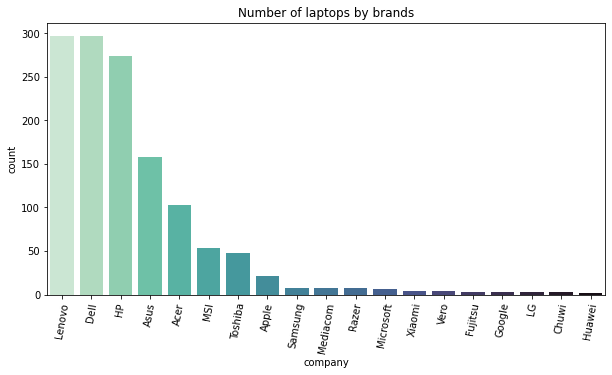

In [367]:
# frequency  plot
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='company', data=df, palette='mako_r', order = df['company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.title('Number of laptops by brands')
plt.show()



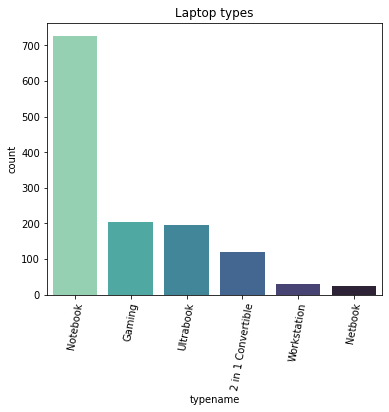

In [369]:
#laptop type frequency plot
fig, ax  = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='typename', data=df,palette='mako_r', order = df['typename'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);

plt.title('Laptop types')
plt.show()

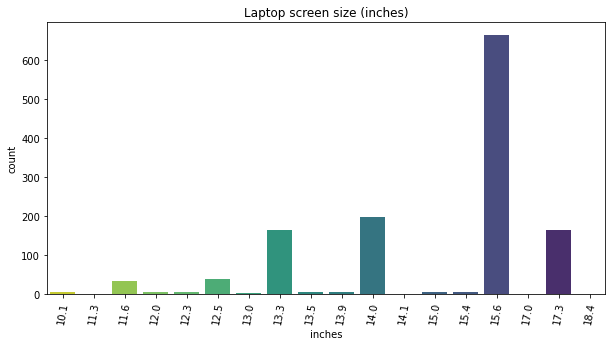

In [370]:
# frequency plot for screensize
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='inches', data=df, palette='viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);

plt.title('Laptop screen size (inches)')
plt.show()

In [352]:

# Writing a custom function to improve plot readability
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()



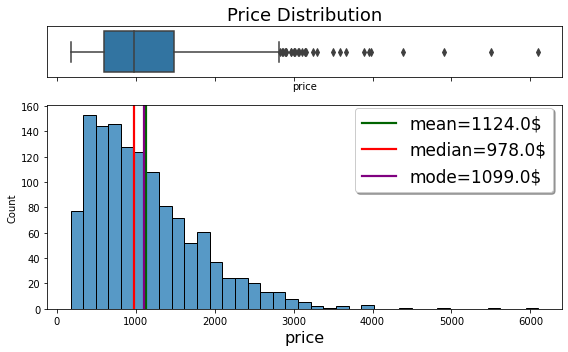

In [353]:
### price distribution 

num_plot(df_clean, 'price', 'Price Distribution','$')

<AxesSubplot:xlabel='typename', ylabel='price'>

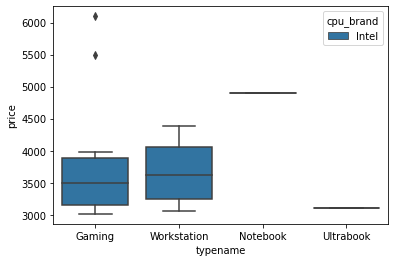

In [354]:
#check for the laptops greater than 3000 euros
sns.boxplot(x='typename', y='price', data=df[df['price']>3000], hue='cpu_brand')

there are 2 outlier values for Gaming Pc, with a price close to 5500 euros and 6000 euros.

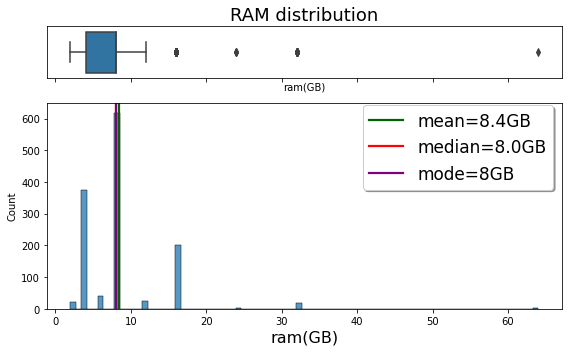

In [355]:
### RAM distribution among laptops
num_plot(df_clean, 'ram(GB)','RAM distribution','GB')

In [356]:
popular_ram_percentage = '{:.2f}'.format(len(df[df['ram(GB)']==8])*100/len(df))
print('Most laptops have 8 GB RAM, which make ' +popular_ram_percentage+ '% of the total laptops.')

Most laptops have 8 GB RAM, which make 47.54% of the total laptops.


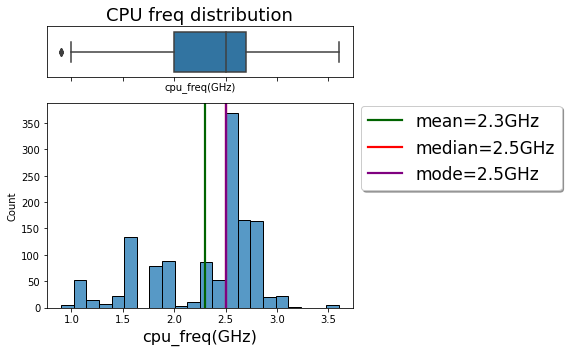

In [357]:
#CPU Frequency distribution among laptops
num_plot(df_clean, 'cpu_freq(GHz)','CPU freq distribution','GHz')

In [358]:
popular_cpufreq_percentage = '{:.2f}'.format(len(df[df['cpu_freq(GHz)']==2.5])*100/len(df))
print('Most laptops have 2.5 GHZ CPU, which make ' +popular_cpufreq_percentage+ '% of the total laptops.')

Most laptops have 2.5 GHZ CPU, which make 22.50% of the total laptops.


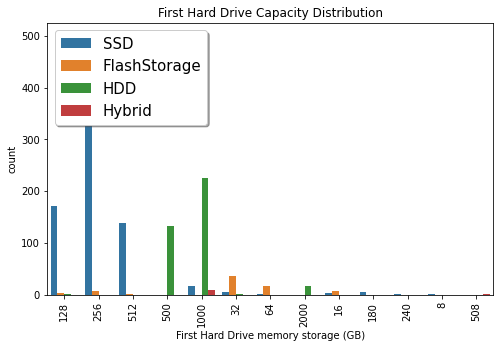

In [359]:
#Hard Drive capacity distribution among laptops¶
fig, ax  = plt.subplots(figsize=(8,5))
ax=sns.countplot(x='memory_1_sto(GB)', data=df, hue='memory_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('First Hard Drive memory storage (GB)')
plt.title('First Hard Drive Capacity Distribution')
plt.legend(loc='upper left', ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
plt.show()

In [360]:
### Outlier detection 
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept

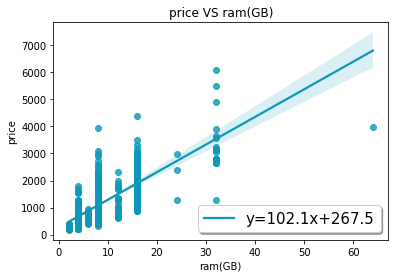

In [361]:
###Price vs Ram 
slope, intercept = lr_plot(df_clean,'ram(GB)','price', 'lower right')

In [362]:
#remove one outlier 
df_clean[df_clean['ram(GB)']>60]

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu_freq(GHz),memory_1_sto(GB),memory_1_type,memory_2_sto(GB),memory_2_type,cpu_brand,gpu_brand
1066,Asus,ROG G701VO,Gaming,17.3,Intel Core i7 6820HK,64,Nvidia GeForce GTX 980,Windows 10,3.58,3975.0,1920x1080,IPSPanel,0.0,2.7,1000,SSD,0,NaN,Intel,Nvidia


In [363]:
df_clean = df_clean[df_clean['ram(GB)']<60]

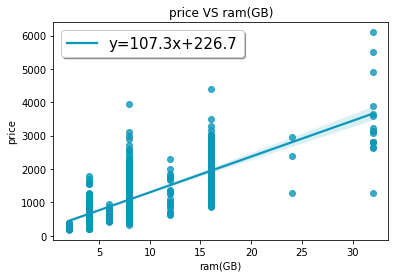

In [364]:
slope, intercept = lr_plot(df_clean,'ram(GB)','price', 'upper left')

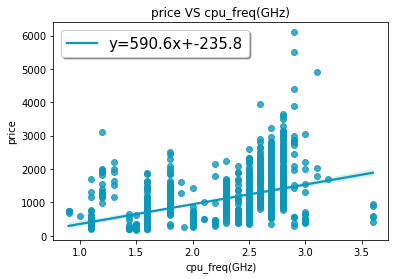

In [365]:
## price vs cpu
slope, intercept = lr_plot(df_clean,'cpu_freq(GHz)','price', 'upper left')

no outliers here 

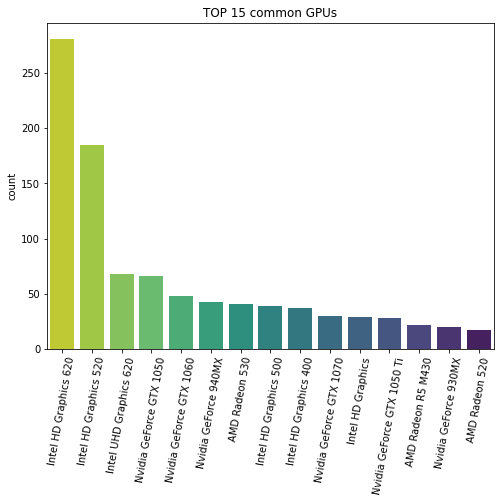

In [371]:
#Most common GPUs¶

gpu_list = df_clean['gpu'].value_counts()[:15].index.tolist()
plt.figure(figsize=(8,6))
ax=sns.countplot(x='gpu', data=df_clean[df_clean['gpu'].isin(gpu_list)], order = gpu_list, palette='viridis_r')
plt.xticks(rotation=80);

plt.title('TOP 15 common GPUs')
plt.xlabel('')
plt.show()



The 2 most common GPUs are integrated Intel GPUs HD Graphics 620 and 520, while the third one is the Nvidia GTX1050.

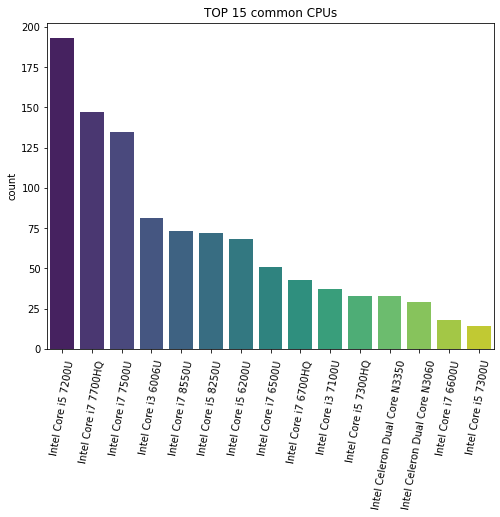

In [372]:
cpu_list = df_clean['cpu'].value_counts()[:15].index.tolist()
plt.figure(figsize=(8,6))
ax=sns.countplot(x='cpu', data=df_clean[df_clean['cpu'].isin(cpu_list)], order = cpu_list, palette='viridis')
plt.xticks(rotation=80);

plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()

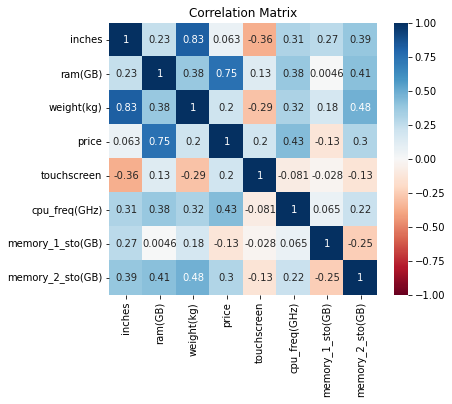

In [373]:
### Correlation Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(df_clean.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()



- RAM has a high positive correlation with price (+0.75): more expensive laptops tends to have a higher price.
- CPU Freq has a quite moderate positive correlation with the price (+0.45).
- Inches and Weight have a high positive correlation (+0.82) since laptops with bigger screens tend to be heavier.



4. Data Preparation for Prediction Model

In [374]:

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA



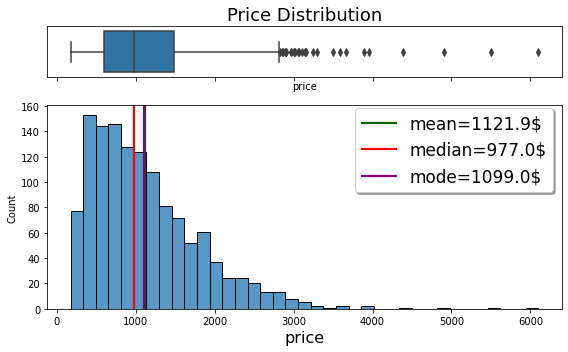

In [375]:


num_plot(df_clean, 'price', 'Price Distribution','$')

we can see that price distribution is right skewed

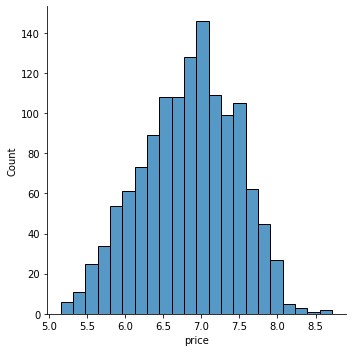

In [376]:

df1=df_clean.copy()
df1['price']=np.log(df1['price'])
sns.displot(df1['price'])


In [377]:
df1=df1.fillna('NaN')

In [378]:
### Feature Encoding

catCols =  ['company','product','typename','cpu','gpu','opsys','resolution',
                    'screentype','resolution','memory_1_type','memory_2_type',
                    'gpu_brand','cpu_brand']

print('Dataframe Encoded Dimension: '
      , pd.get_dummies(df1, columns=catCols, drop_first=True).shape)


Dataframe Encoded Dimension:  (1301, 891)


In [379]:
en = LabelEncoder()
for cols in catCols:
    df1[cols] = en.fit_transform(df1[cols])
    
print('For Label Encoding')
print('Dataframe Encoded Dimension: ', df1.shape)

For Label Encoding
Dataframe Encoded Dimension:  (1301, 20)


In [380]:
X=df1.drop('price', axis = 1).values
y=df1['price'].values

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [382]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
!pip install xgboost
from xgboost import XGBRegressor
regression_models = {
    "lr": LinearRegression(),
    "dt": DecisionTreeRegressor(),
    "gb": GradientBoostingRegressor(),
    "xgb": XGBRegressor()
    

}

models = {}

y_pred_gb = None
y_pred_xgb = None




Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [383]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    models[model_name] = (model.__class__.__name__, model.predict(X_test))
    
    if model_name == 'gb':
        y_pred_gb = models[model_name][1]
    elif model_name == 'xgb':
        y_pred_xgb = models[model_name][1]

for model_name, (model_fullname, predictions) in models.items():
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"{model_fullname}")
    print("Evaluation Metrics:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared (R2) Score: {r2:.4f}")
    print('------------------------------------------------------------------')
    print()

LinearRegression
Evaluation Metrics:
Mean Squared Error (MSE): 0.0872
Mean Absolute Error (MAE): 0.2354
R-squared (R2) Score: 0.7629
------------------------------------------------------------------

DecisionTreeRegressor
Evaluation Metrics:
Mean Squared Error (MSE): 0.0671
Mean Absolute Error (MAE): 0.1897
R-squared (R2) Score: 0.8178
------------------------------------------------------------------

GradientBoostingRegressor
Evaluation Metrics:
Mean Squared Error (MSE): 0.0332
Mean Absolute Error (MAE): 0.1390
R-squared (R2) Score: 0.9098
------------------------------------------------------------------

XGBRegressor
Evaluation Metrics:
Mean Squared Error (MSE): 0.0279
Mean Absolute Error (MAE): 0.1282
R-squared (R2) Score: 0.9243
------------------------------------------------------------------



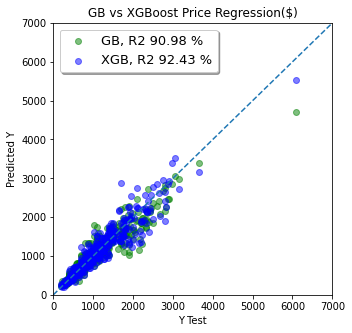

In [384]:
plt.figure(figsize = (5,5))
plt.scatter(np.exp(y_test), np.exp(y_pred_gb), alpha=0.5, color='green',label='GB, R2 {:.2f} %'.format(r2_score(y_test, y_pred_gb)*100))
plt.scatter(np.exp(y_test), np.exp(y_pred_xgb), alpha=0.5, color='blue',label='XGB, R2 {:.2f} %'.format(r2_score(y_test, y_pred_xgb)*100))
plt.plot([0, 7000], [0, 7000], linestyle='--')
plt.axis([0, 7000, 0, 7000])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('GB vs XGBoost Price Regression($)')
plt.legend(loc='upper left', ncol=1, fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.show()

Gradient Boosting Regression: The Gradient Boosting Regression model has a higher R-squared score of    
0.9070, suggesting that the model explains more of the target variable's variance.

XGBoost Regression: The XGBoost Regression model further improves upon the results of Gradient Boosting Regression. It has the highest R-squared score of 0.9112, suggesting that it explains the most variance in the target variable among the models compared.

XGBoost Regression achieving the highest accuracy among the all models.